**Chapter 12 - Let Me Count the Ways**

**<u>Dealing with Random Phenomena</u>**

A **random phenomenon** is a situation in which we know what outcomes could happen, but we don’t know which particular outcome did or will happen.

- In general, each occasion upon which we observe a random phenomenon is called a **trial**.

- At each trial, we note the value of the random phenomenon, and call it an **outcome**.

- When we combine outcomes, the resulting combination is an **event.**

- The collection of all possible outcomes is called the **sample space**.

**<u>The Law of Large Numbers</u>**

<u>Example:</u> You keep track of what happens at an intersection each day. A graph of the accumulated percentage of green lights looks like this:

In [ ]:
# @title 📈 Law of Large Numbers Simulator - Click 'Run Simulation'
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, clear_output

# Configuration
TRUE_PROB = 60 # Default true probability (60%)
COLOR_GREEN = '#2E7D32'
COLOR_RED = '#C62828'

# State management
class LLNSimulator:
    def __init__(self):
        self.days = []
        self.outcomes = []
        self.percentages = []
        self.current_day = 0
        self.successes = 0
        
        self.plot_out = widgets.Output()
        self.table_out = widgets.Output()
        
    def reset(self):
        self.days = []
        self.outcomes = []
        self.percentages = []
        self.current_day = 0
        self.successes = 0
        self.update_display()
        
    def run_trials(self, count):
        new_outcomes = np.random.random(count) < (TRUE_PROB / 100.0)
        for result in new_outcomes:
            self.current_day += 1
            if result: self.successes += 1
            self.days.append(self.current_day)
            self.outcomes.append('Green' if result else 'Red')
            self.percentages.append((self.successes / self.current_day) * 100)
        self.update_display()

    def update_display(self):
        with self.plot_out:
            clear_output(wait=True)
            if not self.days:
                fig, ax = plt.subplots(figsize=(7, 5))
                ax.set_xlim(0, 1000)
                ax.set_ylim(0, 100)
                ax.set_ylabel('Percent Green', fontsize=12)
                ax.set_xlabel('Day Number', fontsize=12)
                ax.set_title('Accumulated Percentage over Time', fontsize=14)
                plt.show()
                return

            fig, ax = plt.subplots(figsize=(7, 5))
            ax.plot(self.days, self.percentages, color=COLOR_GREEN, linewidth=2)
            ax.axhline(y=TRUE_PROB, color='#555', linestyle='--', alpha=0.5, label=f'True Prob ({TRUE_PROB}%)')
            
            ax.set_ylim(0, 100)
            ax.set_ylabel('Percent Green', fontsize=12)
            ax.set_xlabel('Day Number', fontsize=12)
            ax.set_title('Accumulated Percentage over Time', fontsize=14)
            ax.grid(True, linestyle=':', alpha=0.6)
            
            # Show landmark ticks
            landmarks = [1, 2, 6, 100, 300, 500, 800]
            current_ticks = [t for t in landmarks if t <= self.current_day]
            if self.current_day not in current_ticks: current_ticks.append(self.current_day)
            ax.set_xticks(sorted(list(set(current_ticks))))
            
            plt.show()

        with self.table_out:
            clear_output(wait=True)
            if not self.days:
                display(HTML("<p style='color:#777;'>No data yet.</p>"))
                return
            
            html = '<div style="max-height: 300px; overflow-y: auto;"><table style="width:100%; border-collapse: collapse; text-align: center; font-family: sans-serif; font-size: 0.9em;">'
            html += '<tr style="background-color: #f2f2f2; position: sticky; top: 0;"><th>Day</th><th>Light</th><th>% Green</th></tr>'
            
            if len(self.days) <= 12:
                rows = range(len(self.days))
            else:
                rows = list(range(5)) + [None] + list(range(len(self.days)-5, len(self.days)))

            for i in rows:
                if i is None:
                    html += '<tr><td colspan="3" style="padding: 5px; color: #999;">... skipping ...</td></tr>'
                    continue
                c = COLOR_GREEN if self.outcomes[i] == 'Green' else COLOR_RED
                bg = "#fff" if i % 2 == 0 else "#fafafa"
                html += f'<tr style="background-color: {bg}; border-bottom: 1px solid #eee;">'
                html += f'<td style="padding: 5px;">{self.days[i]}</td>'
                html += f'<td style="padding: 5px; color:{c}; font-weight:bold;">{self.outcomes[i]}</td>'
                html += f'<td style="padding: 5px;">{self.percentages[i]:.1f}%</td></tr>'
            html += '</table></div>'
            display(HTML(html))

sim = LLNSimulator()

header = widgets.HTML("""
<div style="background-color: #f8f9fa; padding: 15px; border-radius: 8px; border-left: 5px solid #2E7D32; margin-bottom: 10px;">
    <h3 style="margin-top: 0; color: #2E7D32;">The Law of Large Numbers (LLN)</h3>
    <p style="margin-bottom: 5px;">The <b>Law of Large Numbers</b> states that the long-run relative frequency of repeated independent events gets closer and closer to a single value—the theoretical probability.</p>
    <p style="margin-top: 0;">Because this definition is based on repeatedly observing trial outcomes, it is often called <b>empirical probability</b>.</p>
</div>
""")

batch_dropdown = widgets.Dropdown(
    options=[('Add 1 Day', 1), ('Add 5 Days', 5), ('Add 50 Days', 50), ('Add 100 Days', 100), ('Add 500 Days', 500)],
    value=1,
    description='Step:',
    style={'description_width': 'initial'}
)

run_btn = widgets.Button(description='Run Simulation', button_style='primary', icon='play', layout=widgets.Layout(width='150px'))
reset_btn = widgets.Button(description='Reset', button_style='', layout=widgets.Layout(width='80px'))

def on_run(_): sim.run_trials(batch_dropdown.value)
def on_reset(_): sim.reset()

run_btn.on_click(on_run)
reset_btn.on_click(on_reset)

footer = widgets.HTML("""
<div style="margin-top: 10px; padding: 10px; border-top: 1px solid #eee;">
    <p style="font-size: 0.95em; color: #444;">
        <b>Summary:</b> Observe the <i>Percent Green</i> line. At low day numbers, the percentage is volatile and can jump significantly with each new trial. 
        As you simulate more days, the percentage <b>settles down</b> and stabilizes around the theoretical probability (60%), visually demonstrating the Law of Large Numbers.
    </p>
</div>
""")

controls_box = widgets.VBox([
    widgets.HTML("<b>Interactive Data Table & Controls</b>"),
    sim.table_out,
    widgets.VBox([batch_dropdown, widgets.HBox([run_btn, reset_btn])], layout=widgets.Layout(margin='10px 0 0 0'))
], layout=widgets.Layout(width='38%', margin='0 0 0 20px'))

main_content = widgets.HBox([sim.plot_out, controls_box], layout=widgets.Layout(align_items='flex-start'))

display(header, main_content, footer)
sim.run_trials(1)


**<u>The Nonexistent Law of Averages</u>**

THE LAW OF AVERAGES DOES NOT EXIST! The LLN says nothing about short-run behavior. Relative frequencies even out only in the long run, and this long run is infinitely long.

- The so-called **Law of Averages** (that an outcome of a random event that hasn’t occurred in many trials is “due” to occur) doesn’t exist at all.

In [ ]:
# @title 🎲 The Gambler's Fallacy Simulator - Is it "Due"?
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, clear_output
import time

# Configuration
TRUE_PROB = 0.5 # Fair coin
COLOR_HEADS = '#1976D2' # Blue
COLOR_TAILS = '#E53935' # Red

class LawOfAveragesSim:
    def __init__(self):
        self.streak_len = 5
        self.history = []
        self.after_streak_results = []
        
        self.streak_display = widgets.Output()
        self.test_display = widgets.Output()
        self.status_msg = widgets.HTML("<i>Click the button to find a streak...</i>")

    def find_streak(self, length=5):
        self.streak_len = length
        self.status_msg.value = f"<b>Searching for {length} Tails in a row...</b>"
        
        # Simulate until we hit a streak
        current_streak = 0
        all_flips = []
        while current_streak < length:
            flip = np.random.random() < TRUE_PROB
            all_flips.append('H' if flip else 'T')
            if not flip:
                current_streak += 1
            else:
                current_streak = 0
        
        self.history = all_flips[-length:] # The last N are all Tails
        self.after_streak_results = []
        self.update_streak_ui()
        self.status_msg.value = f"<span style='color:green;'>Found a streak of {length} Tails!</span> Is a 'Head' due now?"

    def run_tests(self, count=100):
        if not self.history:
            self.status_msg.value = "<b style='color:red;'>Find a streak first!</b>"
            return
            
        self.status_msg.value = f"<b>Running {count} trials immediately following the streak...</b>"
        new_flips = np.random.random(count) < TRUE_PROB
        self.after_streak_results = ['H' if f else 'T' for f in new_flips]
        self.update_test_ui()
        self.status_msg.value = f"<b>Finished {count} trials.</b> Notice that having a streak didn't change the 50/50 odds of the next flips."

    def update_streak_ui(self):
        with self.streak_display:
            clear_output(wait=True)
            html = "<div style='display: flex; gap: 10px; margin: 10px 0;'>"
            for f in self.history:
                color = COLOR_TAILS
                html += f'<div style="width: 40px; height: 40px; border-radius: 50%; background-color: {color}; color: white; display: flex; align-items: center; justify-content: center; font-weight: bold; border: 2px solid #900;">{f}</div>'
            html += "</div><p><b>Recent History (all Tails)</b></p>"
            display(HTML(html))
            
    def update_test_ui(self):
        with self.test_display:
            clear_output(wait=True)
            if not self.after_streak_results: return
            
            heads = self.after_streak_results.count('H')
            tails = self.after_streak_results.count('T')
            total = len(self.after_streak_results)
            
            fig, ax = plt.subplots(figsize=(6, 3))
            bars = ax.bar(['Heads', 'Tails'], [heads, tails], color=[COLOR_HEADS, COLOR_TAILS])
            ax.set_ylim(0, max(heads, tails) * 1.3)
            ax.set_title(f'Results of {total} Flips Following the Streak', fontsize=12)
            ax.set_ylabel('Count')
            
            # Label counts
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height} ({height/total*100:.1f}%)', ha='center', va='bottom', fontweight='bold')
            
            plt.show()

sim = LawOfAveragesSim()

# UI Controls
streak_slider = widgets.IntSlider(value=5, min=3, max=8, description='Streak Len:', style={'description_width': 'initial'})
find_btn = widgets.Button(description='Wait for Streak', button_style='warning', icon='search')
test_btn = widgets.Button(description='Run 100 Post-Streak Trials', button_style='primary', layout=widgets.Layout(width='200px'))

find_btn.on_click(lambda _: sim.find_streak(streak_slider.value))
test_btn.on_click(lambda _: sim.run_tests(100))

header = widgets.HTML("""
<div style="background-color: #fff4f4; padding: 15px; border-radius: 8px; border-left: 5px solid #C62828; margin-bottom: 10px;">
    <h3 style="margin-top: 0; color: #C62828;">The Gambler's Fallacy (Law of Averages)</h3>
    <p>The "Law of Averages" is a myth. People often think that if a coin comes up Tails many times in a row, it's <b>"due"</b> to come up Heads next to "even things out."</p>
    <p>In reality, each flip is <b>independent</b>. The coin has no memory of the past!</p>
</div>
""")

controls = widgets.HBox([streak_slider, find_btn, test_btn], layout=widgets.Layout(align_items='center', margin='10px 0'))
layout = widgets.VBox([header, sim.status_msg, controls, sim.streak_display, sim.test_display])

display(layout)


**<u>Modeling Probability</u>**

When probability was first studied, a group of French mathematicians looked at games of chance in which all the possible outcomes were **equally likely**. They developed mathematical models of **theoretical probability**.

- It’s equally likely to get any one of six outcomes from the roll of a fair die.

- It’s equally likely to get heads or tails from the toss of a fair coin.

However, keep in mind that events are not always equally likely.

- A skilled basketball player has a better than 50-50 chance of making a free throw.

The probability of an event is the number of outcomes in the event divided by the total number of possible outcomes.

$P(A)\  = \ \frac{\#\ of\ favorable\ outcomes\ of\ A}{\#\ of\ all\ possible\ outcomes}$

**<u>How to Count</u>**

Fundamental Counting Principle (Part 1: OR)

- If event A has m outcomes and event B has n *different* outcomes, then the number of outcomes in event A or B is m + n.

> <u>Example:</u> You stop at a local café and find that the Lunch Special menu lists 4 salads and 5 sandwiches. For \$5 you can have any salad or sandwich for lunch. How many options are available?

Fundamental Counting Principle (Part 2: AND)

- If event A has m outcomes and *independent* event B has n *different* outcomes, then the number of outcomes in event A and B is mn.

> <u>Example</u>: For bigger eaters this café offers the Hungry Special: any salad and any sandwich
>
> for \$8. How many different lunches are possible now?
>
> <u>Example</u>: Standard Connecticut license plates consist of two letters then five numbers. Assuming all possibilities, how many license plates are available for CT vehicles?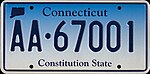

**<u>Permutations and Combinations</u>**

A **factorial** starts with a number and multiplies by each smaller number down to 1.

> <u>Notation</u>: n!
>
> <u>Example</u>: $8! = 8 \cdot 7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1 = 40,320$

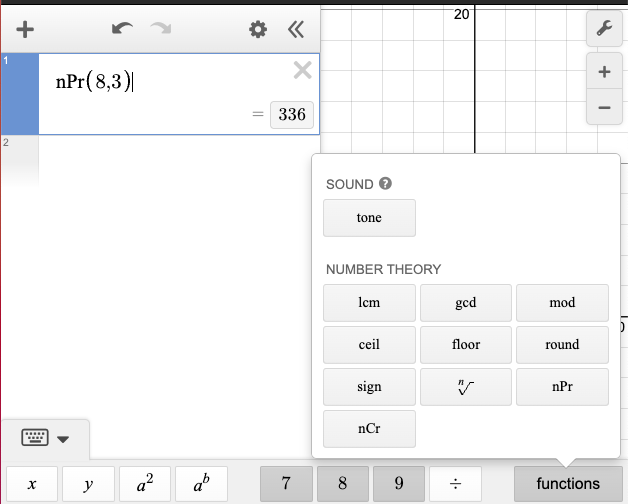

**Permutations** are the number of different ways you can arrange (order) a group of objects.

> <u>Equation:</u>${}_{n}{P_{r} = \frac{n!}{(n - r)!}}_{}$, arrange any *r* items from a group of *n* different items
>
> <u>Example</u>: How many different ways are there for 8 runners to finish 1st, 2nd, and 3rd?
>
> That is, we want the “**permutations** of 8 things taken 3 at a time.”
>
> ${}_{n}{P_{r} = \frac{n!}{(n - r)!} \Rightarrow}_{}{}_{8}{P_{3} = \frac{8!}{(8 - 3)!} = \frac{8!}{5!} = \frac{8 \cdot 7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1}{5 \cdot 4 \cdot 3 \cdot 2 \cdot 1} =}_{}$$8 \cdot 7 \cdot 6$ = 336

**Combinations** are the number of different ways you can arrange a group of objects, BUT

you don’t care about what order the things are in.

> <u>Equation:</u>${}_{n}{C_{r} = \frac{n!}{r!(n - r)!}}_{}$, select any *r* items from a group of *n* different items.
>
> <u>Example:</u> You order a triple scoop ice cream cone. You probably don’t care what order the delicious flavors are in the cone. There are eight choices for ice cream. How many scoop combinations are possible?
>
> ${}_{n}{C_{r} = \frac{n!}{r!(n - r)!} \Rightarrow}_{}{}_{8}{C_{3} = \frac{8!}{3!(8 - 3)!} = \frac{8!}{3! \cdot 5!} = \frac{8 \cdot 7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1}{3 \cdot 2 \cdot 1 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1} = \frac{8 \cdot 7 \cdot 6}{3 \cdot 2 \cdot 1}}_{}$= 56


### Interactive Experiments: Permutations vs. Combinations

Understanding the difference between **Order Matters** (Permutations) and **Order Doesn't Matter** (Combinations) is crucial.

**Scenario: The Pizza Shop**
Imagine you are ordering a pizza.
*   **n (Total Items):** The number of toppings available at the shop (e.g., Pepperoni, Mushrooms, Onions, etc.).
*   **r (Items to Choose):** The number of toppings you want on your pizza.

**Explore:**
*   Does the order of toppings matter? (Is a "Pepperoni & Mushroom" pizza different from a "Mushroom & Pepperoni" pizza?) -> **Combination**.
*   What if we were assigning specific awards (1st place, 2nd place, 3rd place) to people? -> **Permutation**.

Use the tool below to see how the number of possibilities grows as you add more items.


In [ ]:
# @title 🥣 Permutations vs. Combinations Explorer - Click 'Play' to Start

import ipywidgets as widgets
import math
from IPython.display import display, HTML, clear_output

# Create the sliders
style = {'description_width': '150px'}
n_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='Total Items (n):', style=style)
r_slider = widgets.IntSlider(value=3, min=1, max=20, step=1, description='Items to Choose (r):', style=style)

# Create an output area
output_area = widgets.Output()

def update_output(change=None):
    n = n_slider.value
    r = r_slider.value
    
    with output_area:
        clear_output(wait=True)
        
        if r > n:
            display(HTML("<div style='color:red; padding:10px; border:1px solid red; border-radius:5px;'><b>Error:</b> You cannot choose more items (r) than available options (n).</div>"))
            return
            
        perm = math.perm(n, r)
        comb = math.comb(n, r)
        ratio = perm / comb if comb > 0 else 0
        
        html = f"""
        <div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 8px; background-color: #f9f9f9; width: 95%;">
            <h3 style="color: #4CAF50; margin-top:0;">Results for n={n}, r={r}</h3>
            
            <table style="width: 100%; border-collapse: collapse;">
                <tr style="background-color: #e8f5e9;">
                    <td style="padding: 10px; border: 1px solid #ccc;"><b>🎯 Permutations</b><br>(Order Matters)</td>
                    <td style="padding: 10px; border: 1px solid #ccc;"><i>P(n, r) = n! / (n-r)!</i></td>
                    <td style="padding: 10px; border: 1px solid #ccc;"><b style="color:#2e7d32; font-size:1.2em;">{perm:,}</b></td>
                </tr>
                <tr style="background-color: #fff3e0;">
                    <td style="padding: 10px; border: 1px solid #ccc;"><b>🎲 Combinations</b><br>(Order Doesn't Matter)</td>
                    <td style="padding: 10px; border: 1px solid #ccc;"><i>C(n, r) = n! / (r! × (n-r)!)</i></td>
                    <td style="padding: 10px; border: 1px solid #ccc;"><b style="color:#e65100; font-size:1.2em;">{comb:,}</b></td>
                </tr>
            </table>
            
            <div style="margin-top: 15px; padding: 10px; background-color: #e3f2fd; border-radius: 5px;">
                <p style="margin:0;"><b>💡 Key Insight:</b> There are {ratio:.1f} times more ways to arrange items when order matters than when it doesn't.</p>
            </div>
        </div>
        """
        display(HTML(html))

# Bind the sliders to the update function
n_slider.observe(update_output, names='value')
r_slider.observe(update_output, names='value')

# Initial trigger
update_output()

# Layout everything
layout = widgets.VBox([
    widgets.HTML("<b>Use the sliders below to see the difference between Permutations and Combinations:</b>"),
    n_slider, 
    r_slider, 
    output_area
])

display(layout)


**<u>Combinations and Probability</u>**

- First, find the total number of possible outcomes.

- Then find the number of outcomes that we care about in this problem.

- Finally, divide those two numbers, and you’ve got a probability!

<u>Permutations or Combinations</u>: Do not do any arithmetic.

1)  How many 13-card bridge hands could you be dealt from a deck of cards?

2)  How many 3-turn combinations could a padlock have if there are 60 numbers on the dial and combinations can’t have repeated numbers?

3)  How many batting orders could a baseball manager create using the 9 players in his starting lineup?

4)  How many 6-player volleyball squads could a coach put on the floor if there are 9 players on the team?

<u>Example:</u>

Chances are you use a password of some kind every day, whether you’re getting cash from an ATM, logging in to get your email, or checking up on your friends on Instagram. One factor that helps make these codes secure is the large number of possibili-ties. In each of the situations below, how many different passwords are there?

a\) The access code for an ATM is 4 digits (example: 3551).

b\) When you forget your password, some sites send you a tem-porary one and make you change it when you log in. One such site’s temporary password is 5 characters, alternating letter-digit-letter-digit-letter (example: a7r3w).

c\) The temporary password can alternate letters and digits with either a letter or a temporary password digit first (examples: a7r3w or 8m8k3).

d\) That temporary password can be any mixture of letters and digits in any order, and is case-sensitive (example: mp27g isn’t the same as mP27g).

<u>Example</u>:

The betting slips for New Jersey’s Pick-6 Lotto game offer a field of numbers from 1 to 49. Eachbettor chooses any 6 of them. You win the grand prize if your six numbers match those randomly chosen on TV by the NJ Lottery. How many different selections are possible?

<u>Example</u>:

A county legislature consists of 13 elected representatives, 8 Democrats and 5 Republicans. They’re setting up a 4-person committee to study the proposal to build a new library. How many different committees could be formed if the group will consist of:

a\) 4 Republicans?

b\) 4 Democrats?

c\) 2 Democrats and 2 Republicans? (Remember, “and” means multiply.)

d\) 3 Democrats and 1 Republican?

e\) 2 or 3 Democrats (and the rest Republicans)?

<u>Example</u>:

In the last chapter, we asked whether there was something fishy about a college residence hall lottery. A total of 57 students, including 20 people on the same varsity team, applied for just 3 very desirable rooms. When all 3 winners turned out to be team members, the other students cried foul. Is it reasonable to believe this could have hap-pened by chance? Or would it be really unusual if the process were fair? Earlier we used a simulation to help us think about this issue. Now let’s find the probability that all the rooms would go to the teammates if everything were done fairly.

<u>Example</u>:

A DVD Grab Bag contains 6 movies chosen at random from 15 recently popular titles, including 4 comedies, 8 dramas, and 3 animated features.

Find the probability you get:

a\) nothing but dramas.

b\) 3 of the comedies and 3 of the dramas.

c\) all 3 of the animated flicks and any 3 other movies.


### Interactive Experiment: The Birthday Problem

A famous counter-intuitive result in probability (using Combinations!) is the **Birthday Problem**.

**Question:** How many people do you need in a room so that there is a **50% chance** that at least two of them allow share the same birthday?

*   Most people guess a high number (like 180).
*   **Move the slider** to find out the real answer.
*   (Hint: It has to do with how many *pairs* of people you can form. With 23 people, there are ${23 \choose 2} = 253$ possible pairs!)


In [ ]:
# @title Click 'Play' to Run Code

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

def birthday_paradox_sim(k_people=23):
    # Theoretical Calculation
    # P(No Match) = 365/365 * 364/365 * ... * (365-k+1)/365
    prob_no_match = 1.0
    for i in range(k_people):
        prob_no_match *= (365 - i) / 365
    prob_match = 1 - prob_no_match
    
    # Simulation (Run 1000 times)
    n_sims = 1000
    matches = 0
    for _ in range(n_sims):
        birthdays = np.random.randint(1, 366, size=k_people)
        if len(birthdays) != len(set(birthdays)):
            matches += 1
    sim_prob = matches / n_sims
    
    # Visualization
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Bar Chart comparison
    bars = ax.bar(['Theoretical P(Match)', f'Simulated P(Match)\n(n={n_sims})'], 
           [prob_match, sim_prob], color=['skyblue', 'lightgreen'])
    
    ax.set_ylim(0, 1.0)
    ax.set_ylabel('Probability')
    ax.set_title(f"The Birthday Problem (Group Size: {k_people})")
    
    # Add labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}', ha='center', va='bottom', fontsize=12, weight='bold')
                
    # Threshold Line at 50%
    ax.axhline(0.5, color='red', linestyle='--', alpha=0.5)
    ax.text(0.5, 0.52, '50% Chance Threshold', color='red', ha='center')
    
    plt.show()

display(widgets.interactive(birthday_paradox_sim, 
                            k_people=widgets.IntSlider(value=23, min=2, max=100, step=1, description='People in Room:')))
